<a href="https://colab.research.google.com/github/mayankcircle/statistics_primer/blob/main/PMF_CDF_of_Binomial_Distribution_and_T_Shirt_Size_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binomial Random Variable Distribution

## PMF and CDF of Binomial random variable

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

Lets say, we are working on Flights data. Assume, Probability that a person arrives @ airport = 0.902

It is avg behaviour across different flights and passengers.

Here "Arrive" random variable is discrete binary non-uniform and bernaulli random variable.

Arrive ~ Bernaulli(p = 0.902)

In [ ]:
showsup_probability = 0.902

Lets say, the flight capacity is 100 and we want to calculate the probability of arriving 101 people @ airport out of 110 booked customers?

This is Binomial Random Variable represented as X ~ Binomial(n=110,p=0.902)

## Creating 1000 Data points from Binomial Random Variable: X ~ Binomial(n=110,p=0.902)

In [ ]:
# getting Binomial distribution
showsup_distribution =  stats.binom(n = 110, p= showsup_probability)
type(showsup_distribution)

scipy.stats._distn_infrastructure.rv_frozen

In [ ]:
# getting random variates (random sampling from this distribution)
showsup_data = showsup_distribution.rvs(1000)
showsup_data[:40]

array([102, 100,  98,  93,  93,  98,  98, 100,  97,  94,  93, 100, 103,
        99, 106,  98,  98,  95, 102, 102,  99, 101,  97,  99,  98,  97,
       100,  95, 100,  99,  95, 101, 100,  95,  95,  96,  91,  96, 104,
       102])

## Creating PMF from Discrete Random Variable -> Binomial Distribution X

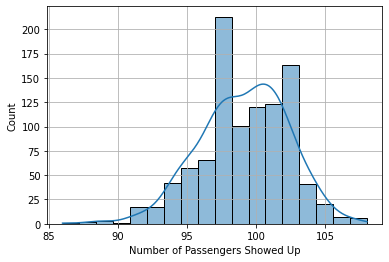

In [ ]:
# One way to plot PMF is draw Smoothed Histogram
sns.histplot(showsup_data, bins = 18, kde = True)
plt.xlabel("Number of Passengers Showed Up")
plt.ylabel("Count")
plt.grid()
plt.show()

**Above PMF shows the Binomial Distribution OR Probabilities for arriving any number of persons @ airport out of total booked 110 Customers**

**Here, PMF is gaussian or Normal**

It shows Mostly (On average), we will get around 100 people on flight if we book for 110 Customers

## Creating CDF from Discrete Random Variable -> Binomial Distribution X

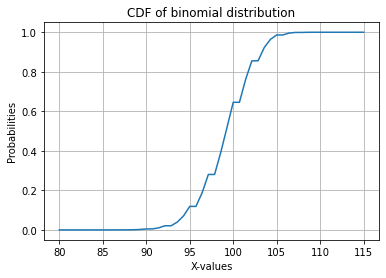

In [ ]:
x = np.linspace(80, 115)
cdf = showsup_distribution.cdf(x)
plt.plot(x, cdf)
plt.xlabel("X-values")
plt.ylabel("Probabilities")
plt.title("CDF of binomial distribution")
plt.grid()
plt.show()

By CDF, we can say-


*   There is ~65% probability that <= 100 customers arrived @ airport out of 110 booked customers (Or in other words, There is 35% probability that we get more than 100 customers @ airport out of 110 booked customers)
*   There is ~ 0 % probability that we get <= 85 customers @ airport out of 110 booked customers



# TShirt Size Problem

You are working a Data Scientist in HR Team. You have random statistically valid Height data for few employees in the company.

Each Tshirt size can be XS, M, L, XL,XXL etc.

Lets say, Tshirt size mapping is-

1. "< 150 cm" : XXS
2. 150-155 cm : XS
3. 155-160 cm : S
4. 160-170 cm : M
5. 170-180 cm : L
6. "180+" : XL

**How much Tshirt of each size we should order for all employees of the company? [We have only sample of employees data]**

In [ ]:
employees = pd.read_csv("employees.csv")

In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1470 non-null   int64 
 1   Department        1470 non-null   object
 2   DistanceFromHome  1470 non-null   int64 
 3   Education         1470 non-null   int64 
 4   EmployeeNumber    1470 non-null   int64 
 5   Gender            1470 non-null   object
 6   Height            1470 non-null   int64 
 7   MaritalStatus     1470 non-null   object
 8   MonthlyIncome     1470 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 103.5+ KB


In [ ]:
employees.head()

,Age,Department,DistanceFromHome,Education,EmployeeNumber,Gender,Height,MaritalStatus,MonthlyIncome
0,41,Sales,1,2,1,Female,154,Single,5993
1,49,Research & Development,8,1,2,Male,168,Married,5130
2,37,Research & Development,2,2,4,Male,163,Single,2090
3,33,Research & Development,3,4,5,Female,161,Married,2909
4,27,Research & Development,2,1,7,Male,157,Married,3468


**In Tshirt Size problem, Only Gender and Height are the relevant features.**

### Plot Height Distribution (Equivalent to PDF)

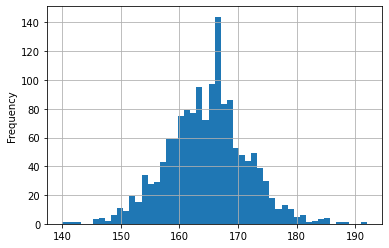

In [ ]:
employees["Height"].plot(kind="hist",bins=50)
plt.grid()
plt.show()

We know that following Natural phenomenons are following always Normal OR Gaussian Distribution -


1.   Heights
2.   Birth Weights
3.   Shoe-sizes
4.   mesurement errors
5.   size of leaves/petals



## Sample Mean and Std deviation of Height

In [ ]:
sample_mean = employees["Height"].mean()
sample_stddev = employees["Height"].std()

print("sample_mean: ",sample_mean," sample_stddev: ",sample_stddev)

sample_mean:  164.6734693877551  sample_stddev:  6.887961959078209


## Strategy

**We had the 1470 employees data (Sample). Since we know that Height follows Normal Distribution, we computed our Statistical model which is Normal Distribution (mean, std dev)**

**Now we can generate 10K employees data from this statistical model**

In [ ]:
# Making a Normal Distribution
height_dist = stats.norm(loc = sample_mean, scale = sample_stddev)


In [ ]:
# create 10K data points (Employees) from Normal Distribution
population_height = height_dist.rvs(10000)

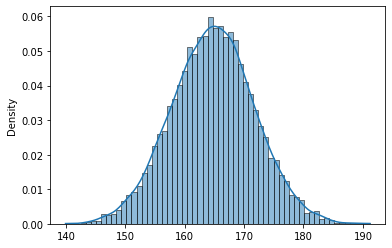

In [ ]:
# Visualize Smoothed Histogram (We can refer it as PDF)
sns.histplot(population_height, kde=True, stat="density")

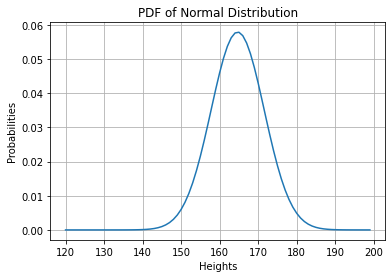

In [ ]:
# Compute PDF (Mathematically, PDF and Smooth Hist are different, It is computed by derivative of CDF)
x = np.arange(120,200)

# plotting PDF with Scipy
pdf = height_dist.pdf(x)
plt.plot(x,pdf)
plt.xlabel("Heights")
plt.ylabel("Probabilities")
plt.title("PDF of Normal Distribution")
plt.grid()
plt.show()


## Total XXS T-shirts to order for 10K population (employees of the company)

XXS size means "< 150 cm" 

In [ ]:
height_150 = height_dist.cdf(x = 150) # P(X <= 150)
height_150

0.016573163101179463

In [ ]:
math.ceil(height_150 * 10000) # Total employees having heights <= 150

166

We should order 166 T-shirts of size XXS.

## Total M T-shirts to order for 10K population (employees of the company)

M size means 160 to 170 cm

In [ ]:
height_160 = height_dist.cdf(x = 160) # P(X <= 160)
height_170 = height_dist.cdf(x = 170) # P(X <= 170)

height_160_170 = height_170 - height_160
height_160_170


0.5316026117915521

In [ ]:
math.ceil(height_160_170 * 10000) # Total employees having heights between 160 to 170

5317

We should order 5317 Tshirts for M size.

In [ ]:
height_160

0.2487279509102499

In [ ]:
height_170

0.780330562701802